In [473]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)

In [474]:
True_w1 = 300
True_w0 = 800

def true_target(x):
  return True_w1*x + True_w0

def observed_target(x):
  """Underlying data with Gaussian noise added"""
  normal_noise = np.random.normal()
  return true_target(x) + normal_noise * 30

N = 50

# Features, X is [1,50]
# X = np.arange(N).reshape(N, 1)
X = np.random.rand(N).reshape(N, 1)

# Observed targets
y = np.array([observed_target(x) for x in X]).reshape(N, 1)

# Append 1 for intercept term later
X = np.hstack([np.ones((N, 1)), X])

# Ranges of w0 and w1 to see, centering at the true line
spanning_radius = np.max([1000, True_w0, True_w1])
step = 1

graph_center_point = [True_w0 / 2, True_w1 / 2]

w0range = np.arange(graph_center_point[0]-spanning_radius, graph_center_point[0]+spanning_radius, step)
w1range = np.arange(graph_center_point[1]-spanning_radius, graph_center_point[1]+spanning_radius, step)
w0grid, w1grid = np.meshgrid(w0range, w1range)

range_len = len(w0range)
print("Number of values in each axis:", range_len)

Number of values in each axis: 2000


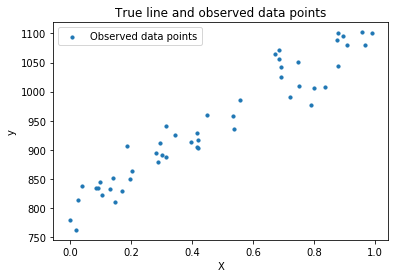

In [475]:
plt.figure()
plt.scatter(X[:,1:], y, s=10, label='Observed data points')
# plt.plot(X[:,1:], true_target(X[:,1:]), alpha=0.4, label='True line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('True line and observed data points')
plt.show()

In [476]:
# Make [w0, w1] in (2, 14400) shape
all_w0w1_values = np.hstack([w0grid.flatten()[:,None], w1grid.flatten()[:,None]]).T

# Compute raw losses
raw_losses = np.linalg.norm(y - (X @ all_w0w1_values), axis=0) ** 2
raw_losses = raw_losses.reshape((range_len, range_len))

# Compute L2 penalty losses
ridge_penalty_losses = np.linalg.norm(all_w0w1_values, axis=0) ** 2
ridge_penalty_losses = ridge_penalty_losses.reshape((range_len, range_len))

# Compute L1 penalty losses
lasso_penalty_losses = np.linalg.norm(all_w0w1_values, axis=0, ord=1)
lasso_penalty_losses = lasso_penalty_losses.reshape((range_len, range_len))

## L2 surface

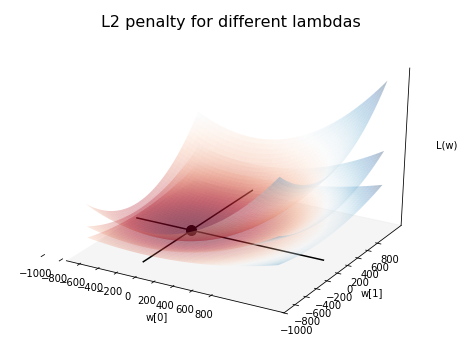

In [477]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

# ax.plot_surface(w0grid, w1grid, raw_losses, alpha=0.4, cmap='RdBu')
# ax.contour(w0grid, w1grid, raw_losses, offset=0.1, alpha=0.4, cmap='RdBu')

ax.plot_surface(w0grid, w1grid, ridge_penalty_losses, alpha=0.3, cmap='RdBu')
ax.plot_surface(w0grid, w1grid, 0.5 * ridge_penalty_losses, alpha=0.3, cmap='RdBu')
ax.plot_surface(w0grid, w1grid, 0.25 * ridge_penalty_losses, alpha=0.3, cmap='RdBu')
# ax.contour(w0grid, w1grid, ridge_penalty_losses, levels=10, offset=0.1, alpha=1, cmap='RdBu')
# ax.contour(w0grid, w1grid, lasso_penalty_losses, levels=10, offset=0.1, alpha=1, cmap='plasma_r')

# Marking
ax.scatter([0],[0], 0, c='black', s=100)

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

# ax.legend(loc='best')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.set_zlabel('L(w)')
ax.set_xticks(np.arange(0-spanning_radius, 0+spanning_radius, 200))
ax.set_yticks(np.arange(0-spanning_radius, 0+spanning_radius, 200))
ax.set_zticks([])
ax.set_title("L2 penalty for different lambdas", fontsize=16)
# plt.axis('off')
# ax.set_zlim(0, 20000)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, .0, 0.0))

ax.grid(False)

plt.show()

## L1 Surface

In [478]:
lasso_penalty_losses

array([[1450., 1449., 1448., ..., 2247., 2248., 2249.],
       [1449., 1448., 1447., ..., 2246., 2247., 2248.],
       [1448., 1447., 1446., ..., 2245., 2246., 2247.],
       ...,
       [1747., 1746., 1745., ..., 2544., 2545., 2546.],
       [1748., 1747., 1746., ..., 2545., 2546., 2547.],
       [1749., 1748., 1747., ..., 2546., 2547., 2548.]])

In [479]:
ridge_penalty_losses

array([[1082500., 1081301., 1080104., ..., 2674109., 2676904., 2679701.],
       [1080801., 1079602., 1078405., ..., 2672410., 2675205., 2678002.],
       [1079104., 1077905., 1076708., ..., 2670713., 2673508., 2676305.],
       ...,
       [1675609., 1674410., 1673213., ..., 3267218., 3270013., 3272810.],
       [1677904., 1676705., 1675508., ..., 3269513., 3272308., 3275105.],
       [1680201., 1679002., 1677805., ..., 3271810., 3274605., 3277402.]])

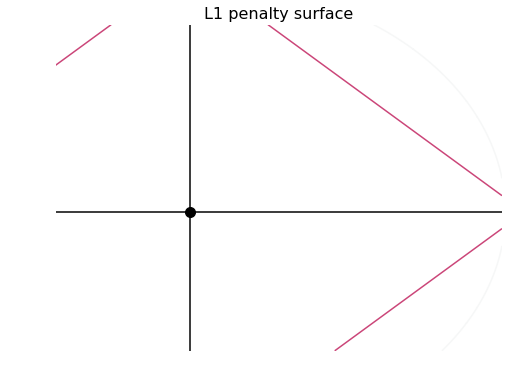

In [480]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
# ax = fig.gca(projection='3d')
ax = fig.gca()

# ax.plot_surface(w0grid, w1grid, raw_losses, alpha=0.4, cmap='RdBu')
# ax.contour(w0grid, w1grid, raw_losses, offset=0.1, alpha=0.4, cmap='RdBu')

# ax.plot_surface(w0grid, w1grid, ridge_penalty_losses, alpha=0.6, cmap='RdBu')
# ax.plot_surface(w0grid, w1grid, lasso_penalty_losses, alpha=0.6, cmap='RdBu')

levels = 1 #[10.0]
ax.contour(w0grid, w1grid, ridge_penalty_losses, levels=levels, alpha=1.0, cmap='RdBu')
ax.contour(w0grid, w1grid, lasso_penalty_losses, levels=levels, alpha=1, cmap='plasma_r')

# Marking
ax.scatter([0],[0], c='black', s=100)

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

# ax.legend(loc='best')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
# ax.set_zlabel('L(w)')
# ax.set_xticks(np.arange(0-spanning_radius, 0+spanning_radius, 200))
# ax.set_yticks(np.arange(0-spanning_radius, 0+spanning_radius, 200))
# ax.set_zticks(levels)
ax.set_title("L1 penalty surface", fontsize=16)
plt.axis('off')
# ax.set_zlim(0, 100)

# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))

# ax.grid(False)

plt.show()

## Loss with Linear Reg

In [598]:
Lambda = 150

from sklearn.linear_model import LinearRegression, Ridge, Lasso

clf = LinearRegression(fit_intercept=False)
clf.fit(X,y)
min_lr = clf.coef_[0]

ridge = Ridge(alpha=Lambda, fit_intercept=False)
ridge.fit(X,y)
min_ridge = ridge.coef_[0]

lasso = Lasso(alpha=Lambda, fit_intercept=False)
lasso.fit(X,y)
min_lasso = lasso.coef_

In [599]:
print(min_lr)
print(min_ridge)
print(min_lasso)

[800.04268743 308.16264311]
[223.10632422 110.33087303]
[793.94712248   0.        ]


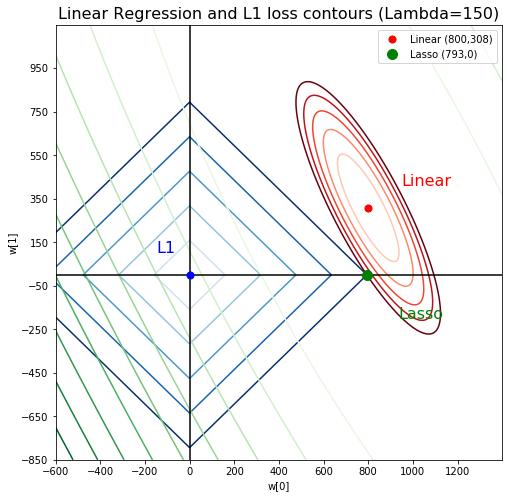

In [600]:
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
# ax = fig.gca(projection='3d')

penalty_losses = Lambda * lasso_penalty_losses

min_fitting_loss = np.linalg.norm(y.flatten() - X@min_lasso) ** 2
min_penalty_loss = Lambda * np.linalg.norm(min_lasso, ord=1)

fitting_levels = np.arange(0, min_fitting_loss+0.1, min_fitting_loss/5)
penalty_levels = np.arange(0, min_penalty_loss+0.1, min_penalty_loss/5)

ax.contour(w0grid, w1grid, penalty_losses, levels=penalty_levels, alpha=1, cmap='Blues')
ax.contour(w0grid, w1grid, raw_losses, levels=fitting_levels, alpha=1, cmap='Reds')
ax.contour(w0grid, w1grid, raw_losses + penalty_losses, levels=10, alpha=1, cmap='Greens')

# Marking
ax.scatter([0],[0], c='blue', zorder=10, s=50)
ax.scatter([min_lr[0]],[min_lr[1]], c='red', s=50, label='Linear ({},{})'.format(*min_lr.astype(int)))
# ax.scatter([min_ridge[0]],[min_ridge[1]], c='green', s=50, label='Ridge ({},{})'.format(*min_ridge.astype(int)))
ax.scatter([min_lasso[0]],[min_lasso[1]], c='green', s=100, zorder=10, label='Lasso ({},{})'.format(*min_lasso.astype(int)))

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

ax.legend(loc='best')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
# ax.set_zlabel('L(w)')

ax.text(0-150, 0+100, s='L1', fontsize=16, color='blue')
ax.text(800+150, 308+100, s='Linear', fontsize=16, color='red')
ax.text(883+50, 0-200, s='Lasso', fontsize=16, color='green', zorder=20)

ax.set_xticks(np.arange(graph_center_point[0]-spanning_radius, graph_center_point[0]+spanning_radius, 200))
ax.set_yticks(np.arange(graph_center_point[1]-spanning_radius, graph_center_point[1]+spanning_radius, 200))
# ax.set_zticks([])
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_title("Linear Regression and L1 loss contours (Lambda={})".format(Lambda), fontsize=16)

# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, .0, 0.0))

ax.grid(False)

plt.show()

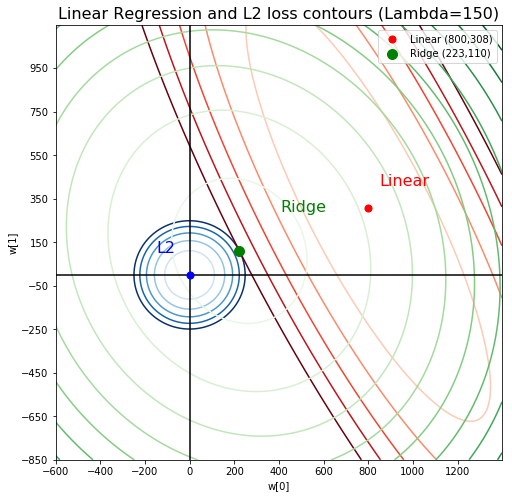

In [601]:
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.gca()

penalty_losses = Lambda * ridge_penalty_losses


min_fitting_loss = np.linalg.norm(y.flatten() - X@min_ridge) ** 2
min_penalty_loss = Lambda * np.linalg.norm(min_ridge, ord=2) ** 2

fitting_levels = np.arange(0, min_fitting_loss+0.1, min_fitting_loss/5)
penalty_levels = np.arange(0, min_penalty_loss+0.1, min_penalty_loss/5)

ax.contour(w0grid, w1grid, penalty_losses, levels=penalty_levels, alpha=1, cmap='Blues')
ax.contour(w0grid, w1grid, raw_losses, levels=fitting_levels, alpha=1, cmap='Reds')

ax.contour(w0grid, w1grid, penalty_losses + raw_losses, levels=10, alpha=1, cmap='Greens')

# ax.plot_surface(w0grid, w1grid, penalty_losses, alpha=0.3, cmap='RdBu')
# ax.plot_surface(w0grid, w1grid, raw_losses, alpha=0.3, cmap='plasma_r')

# Marking
ax.scatter([0],[0], c='blue', zorder=10, s=50)
ax.scatter([min_lr[0]],[min_lr[1]], c='red', s=50, label='Linear ({},{})'.format(*min_lr.astype(int)))
ax.scatter([min_ridge[0]],[min_ridge[1]], c='green', s=100, alpha=1.0, zorder=10, label='Ridge ({},{})'.format(*min_ridge.astype(int)))
# ax.scatter([min_lasso[0]],[min_lasso[1]], c='blue', s=50, label='Lasso ({},{})'.format(*min_lasso.astype(int)))

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

ax.legend(loc='best')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')

ax.text(0-150, 0+100, s='L2', fontsize=16, color='blue')
ax.text(800+50, 308+100, s='Linear', fontsize=16, color='red')
ax.text(388+20, 190+100, s='Ridge', fontsize=16, color='green', zorder=20)
# ax.set_zlabel('L(w)')

ax.set_xticks(np.arange(graph_center_point[0]-spanning_radius, graph_center_point[0]+spanning_radius, 200))
ax.set_yticks(np.arange(graph_center_point[1]-spanning_radius, graph_center_point[1]+spanning_radius, 200))
# ax.set_zticks([])
ax.set_title("Linear Regression and L2 loss contours (Lambda={})".format(Lambda), fontsize=16)

# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, .0, 0.0))

ax.grid(False)

plt.show()

## Ridge and Lasso Minimum

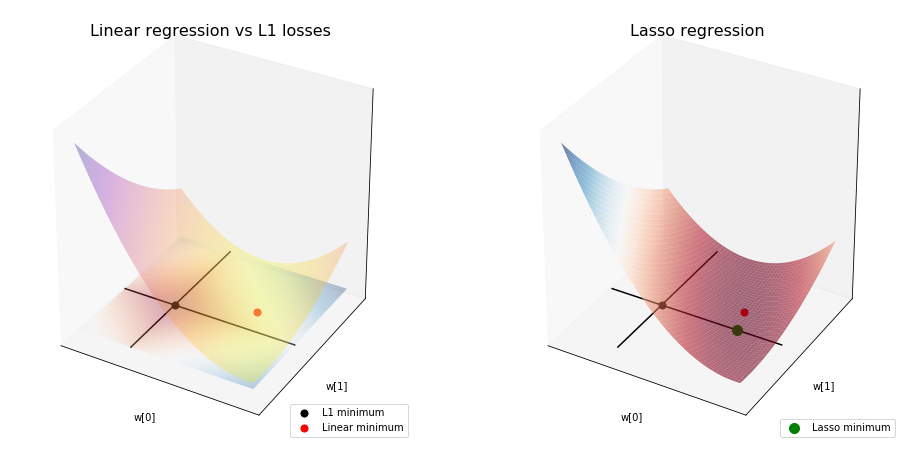

In [587]:
%matplotlib inline

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
# ax = fig.gca(projection='3d')

# penalty_losses = Lambda * ridge_penalty_losses
penalty_losses = Lambda * lasso_penalty_losses

ax.plot_surface(w0grid, w1grid, penalty_losses, alpha=0.3, cmap='RdBu')
ax.plot_surface(w0grid, w1grid, raw_losses, alpha=0.3, cmap='plasma_r')

# Marking
ax.scatter([0],[0], c='black', s=50, label='L1 minimum')
ax.scatter([min_lr[0]],[min_lr[1]], c='red', s=50, label='Linear minimum')

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

ax.legend(loc='lower right')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
# ax.set_zlabel('L(w)')

# ax.set_xticks(np.arange(graph_center_point[0]-spanning_radius, graph_center_point[0]+spanning_radius, 200))
# ax.set_yticks(np.arange(graph_center_point[1]-spanning_radius, graph_center_point[1]+spanning_radius, 200))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title("Linear regression vs L1 losses", fontsize=16)


# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, .0, 0.0))

ax.grid(False)


ax = fig.add_subplot(122, projection='3d')

ax.plot_surface(w0grid, w1grid, penalty_losses + raw_losses, alpha=0.6, cmap='RdBu')

# Marking
ax.scatter([0],[0], c='black', s=50)
ax.scatter([min_lr[0]],[min_lr[1]], c='red', s=50)
ax.scatter([min_lasso[0]],[min_lasso[1]], c='green', s=100, label='Lasso minimum')

ax.plot([np.min(w0range), np.max(w0range)], [0, 0], [0, 0], c='black')
ax.plot([0, 0], [np.min(w1range), np.max(w1range)], [0, 0], c='black')

ax.legend(loc='lower right')
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
# ax.set_zlabel('L(w)')

# ax.set_xticks(np.arange(graph_center_point[0]-spanning_radius, graph_center_point[0]+spanning_radius, 200))
# ax.set_yticks(np.arange(graph_center_point[1]-spanning_radius, graph_center_point[1]+spanning_radius, 200))
# ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title("Lasso regression", fontsize=16)

# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((0.0, 0.0, .0, 0.0))

ax.grid(False)

plt.show()

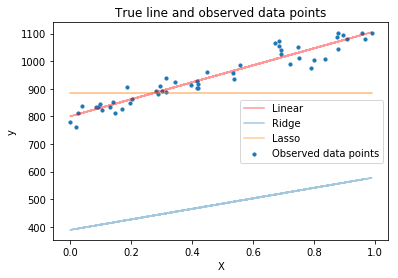

In [589]:
plt.figure()
plt.scatter(X[:,1:], y, s=10, label='Observed data points')
plt.plot(X[:,1:], X @ min_lr, alpha=0.4, c='red', label='Linear')
plt.plot(X[:,1:], X @ min_ridge, alpha=0.4, label='Ridge')
plt.plot(X[:,1:], X @ min_lasso, alpha=0.4, label='Lasso')

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('True line and observed data points')
plt.show()

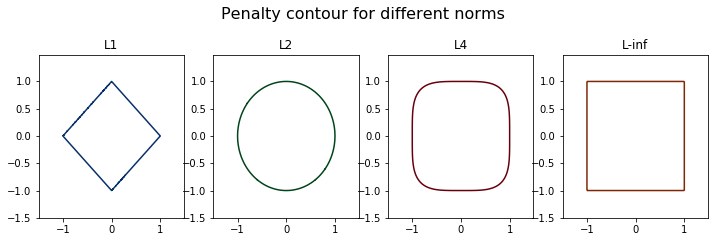

In [557]:
def plot_penalty_terms():
  w0range = np.arange(-1.5, 1.5, step=0.01)
  w1range = np.arange(-1.5, 1.5, step=0.01)
  w0grid, w1grid = np.meshgrid(w0range, w1range)
  all_w0w1_values = np.hstack([w0grid.flatten()[:,None], w1grid.flatten()[:,None]]).T
  
  Lambda = 0.1
  l1 = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=1)
  l2 = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=2) ** 2
  
  l4 = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=4) ** 4
  linf = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=np.inf)
  
  l1 = l1.reshape(w0grid.shape)
  l2 = l2.reshape(w0grid.shape)
  l4 = l4.reshape(w0grid.shape)
  linf = linf.reshape(w0grid.shape)
  
  fig = plt.figure(figsize=(12, 3))
  ax = fig.add_subplot(141)
  lvls = [Lambda]
#   lvls = np.arange(0, Lambda, Lambda/5)
  ax.contour(w0grid, w1grid, l1, levels=lvls, cmap='Blues_r')
  ax.set_title('L1')
  
  ax = fig.add_subplot(142)
  ax.contour(w0grid, w1grid, l2, levels=lvls, cmap='Greens_r')
  ax.set_title('L2')
  
  ax = fig.add_subplot(143)
  ax.contour(w0grid, w1grid, l4, levels=lvls, cmap='Reds_r')
  ax.set_title('L4')
  
  ax = fig.add_subplot(144)
  ax.contour(w0grid, w1grid, linf, levels=lvls, cmap='Oranges_r')
  ax.set_title('L-inf')
#   ax.scatter([0],[0], c='orange', s=50)
#   ax.legend(loc='best')
  ax.grid(False)
  fig.suptitle('Penalty contour for different norms', fontsize=16, y=1.1)
  plt.show()
  
plot_penalty_terms()

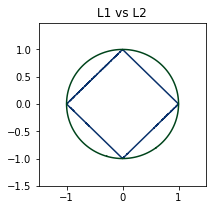

In [595]:
def plot_l1l2_terms():
  w0range = np.arange(-1.5, 1.5, step=0.01)
  w1range = np.arange(-1.5, 1.5, step=0.01)
  w0grid, w1grid = np.meshgrid(w0range, w1range)
  all_w0w1_values = np.hstack([w0grid.flatten()[:,None], w1grid.flatten()[:,None]]).T
  
  Lambda = 0.1
  l1 = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=1)
  l2 = Lambda * np.linalg.norm(all_w0w1_values, axis=0, ord=2) ** 2
  
  l1 = l1.reshape(w0grid.shape)
  l2 = l2.reshape(w0grid.shape)
  
  fig = plt.figure(figsize=(3, 3))
  ax = fig.gca()
  lvls = [Lambda]
  ax.contour(w0grid, w1grid, l1, levels=lvls, cmap='Blues_r')
  ax.contour(w0grid, w1grid, l2, levels=lvls, cmap='Greens_r')
  ax.set_title("L1 vs L2")
  
  ax.grid(False)
  plt.show()
  
plot_l1l2_terms()